In [7]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your DuckDB database
con = duckdb.connect('/mnt/d/Parag/Learning/projects/stock-pipeline/dbt_models/dev.duckdb')

con.execute("INSTALL httpfs;")
con.execute("LOAD httpfs;")

# set MinIO creds (adjust for your setup)
con.execute("SET s3_endpoint='localhost:9000';")
con.execute("SET s3_url_style='path';")
con.execute("SET s3_use_ssl=false;")
con.execute("SET s3_access_key_id='minioadmin';")
con.execute("SET s3_secret_access_key='minioadmin';")

# Simple query
df = con.execute("SELECT ticker,price,ts,volume FROM stocks_prices LIMIT 20").df()
df.head(10)


,ticker,price,ts,volume
0,AAPL,1430.06,2025-08-09 16:04:34.475047,946
1,TSLA,188.77,2025-08-09 16:04:39.480984,763
2,GOOG,393.37,2025-08-09 16:04:44.486907,469
3,MSFT,205.66,2025-08-09 16:04:49.493104,951
4,MSFT,1027.72,2025-08-09 16:04:54.501095,528
5,TSLA,1298.05,2025-08-09 16:04:59.507990,290
6,TSLA,562.54,2025-08-09 16:14:00.091160,562
7,AAPL,936.97,2025-08-09 16:14:05.096884,980
8,MSFT,280.04,2025-08-09 16:14:10.102650,430
9,AAPL,660.77,2025-08-09 16:14:15.108746,349


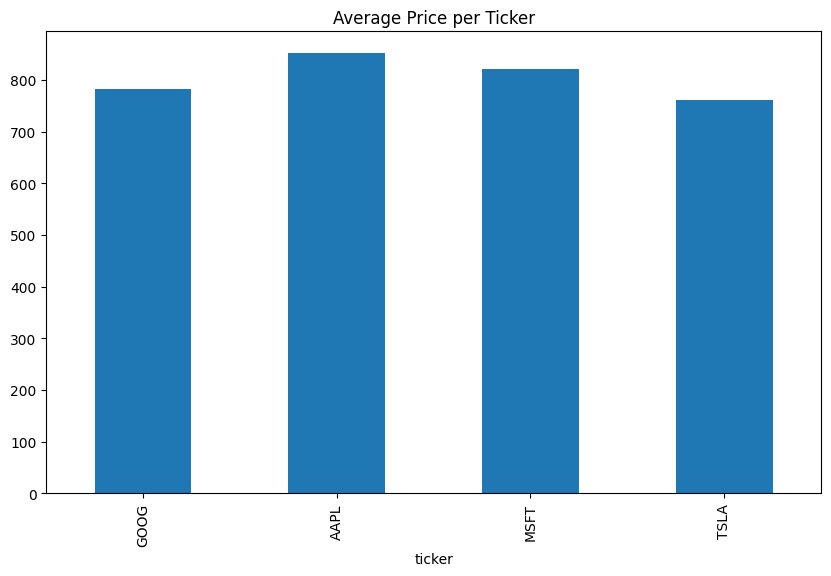

In [8]:
df = con.execute("""
    SELECT ticker, AVG(price) as avg_price
    FROM stocks_prices
    GROUP BY ticker
""").df()

df.plot(x="ticker", y="avg_price", kind="bar", figsize=(10,6), legend=False)
plt.title("Average Price per Ticker")
plt.show()

In [11]:
df = con.execute("""
    SELECT any_value(hour) as hour, ticker, AVG(price) as avg_price
    FROM stocks_prices
    group by hour, ticker
    ORDER BY hour, ticker
""").df()

for ticker in df['ticker'].unique():
    subset = df[df['ticker'] == ticker]
    plt.plot(subset['hour'], subset['avg_price'], label=ticker)

plt.legend()
plt.title("Stock Prices Over Time")
plt.xlabel("Hour")
plt.ylabel("Avg Price")
plt.show()


InvalidInputException: Invalid Input Error: Failed to read file "s3://stock-data-local/streaming-output/year=2025/month=8/day=30/hour=21/part-00000-3530c23e-272f-4c8d-9d78-f5cb9204200f.c000.snappy.parquet": schema mismatch in glob: column "hour" was read from the original file "s3://stock-data-local/streaming-output/year=2025/month=8/day=10/part-00000-64d391bc-6211-4250-ab35-1cd301245854.c000.snappy.parquet", but could not be found in file "s3://stock-data-local/streaming-output/year=2025/month=8/day=30/hour=21/part-00000-3530c23e-272f-4c8d-9d78-f5cb9204200f.c000.snappy.parquet".
Candidate names: ticker, price, volume, ts
If you are trying to read files with different schemas, try setting union_by_name=True